In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from typing import Optional
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [25]:
def load_data_to_dta_frame(filepath:str)->Optional[DataFrame]:
  '''
  Load a csv file to a pandas data frame
  Args:
      filepath: str: path to the csv file
  Returns:
       DataFrame: a pandas data frame
  '''
  try:
    return pd.read_csv(filepath)
  except FileNotFoundError:
    print(f'file not found at {filepath}')
    return None
data = load_data_to_dta_frame('../data/raw/credit_risk_dataset.csv')

In [26]:
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [28]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [29]:
data.shape

(32581, 12)

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [31]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [32]:
def rename_observation(data:DataFrame)->DataFrame:
  '''
  Rename the observation column to id
  Args:
      data: DataFrame: a pandas data frame
  Returns:
       DataFrame: a pandas data frame
  '''
  for col in data.columns:
    if data[col].dtype == 'object':
      data[col] = data[col].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
  return data


In [33]:
data = rename_observation(data)
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,rent,own,mortgage,rent,rent
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,personal,education,medical,medical,medical
loan_grade,d,b,c,c,c
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [34]:
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,rent,123.0,personal,d,35000,16.02,1,0.59,y,3
1,21,9600,own,5.0,education,b,1000,11.14,0,0.10,n,2
2,25,9600,mortgage,1.0,medical,c,5500,12.87,1,0.57,n,3
3,23,65500,rent,4.0,medical,c,35000,15.23,1,0.53,n,2
4,24,54400,rent,8.0,medical,c,35000,14.27,1,0.55,y,4
5,21,9900,own,2.0,venture,a,2500,7.14,1,0.25,n,2
6,26,77100,rent,8.0,education,b,35000,12.42,1,0.45,n,3
7,24,78956,rent,5.0,medical,b,35000,11.11,1,0.44,n,4
8,24,83000,rent,8.0,personal,a,35000,8.90,1,0.42,n,2
9,21,10000,own,6.0,venture,d,1600,14.74,1,0.16,n,3


In [35]:
def drop_duplicate(data:DataFrame)->DataFrame:
  '''
  Drop duplicate rows in a pandas data frame
  Args:
      data: DataFrame: a pandas data frame
  Returns:
       DataFrame: a pandas data frame
  '''
  return data.drop_duplicates()

In [36]:
data = drop_duplicate(data)

In [37]:
data.duplicated().sum()

0

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [39]:
def fill_null_values_skewness(data:DataFrame,column:str)->DataFrame:
  '''
  Calculate the skewness of the data
  Args:
      data: DataFrame: a pandas data frame
      column: str: the column to calculate the skewness
  Returns:
       DataFrame: a pandas data frame
  '''
  skewness_value = data[column].skew()
  if skewness_value > 1:
    data[column] = data[column].fillna(data[column].median())
  else:
    data[column] = data[column].fillna(data[column].mean())
  return data[column]

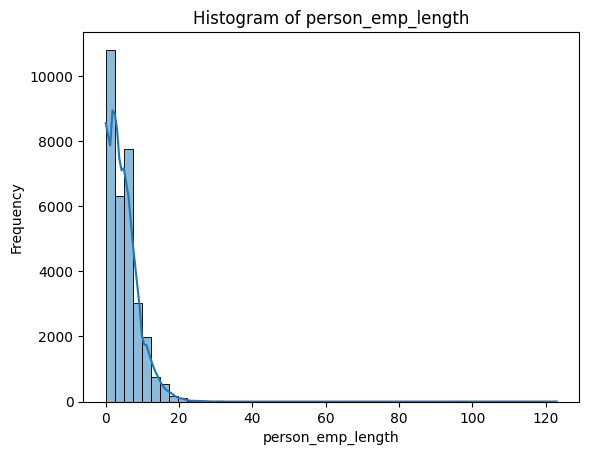

In [40]:
sns.histplot(data['person_emp_length'],bins=50,kde=True)
plt.ylabel('Frequency')
plt.xlabel('person_emp_length')
plt.title('Histogram of person_emp_length')
plt.show()

In [41]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [42]:
data.person_emp_length  = fill_null_values_skewness(data,'person_emp_length')
data.loan_int_rate =   fill_null_values_skewness(data,'loan_int_rate')

In [43]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(data, bins=30, figsize=(20, 15), title=None):
    """
    Plots histograms for all columns in a DataFrame.

    Parameters:
    - data (pd.DataFrame): The dataset to plot histograms for.
    - bins (int): Number of bins for the histograms. Default is 30.
    - figsize (tuple): Figure size for the plot. Default is (20, 15).
    - title (str): Optional title for the overall plot.
    """
    data.hist(bins=bins, figsize=figsize)
    if title:
        plt.suptitle(title, fontsize=16)
    plt.show()

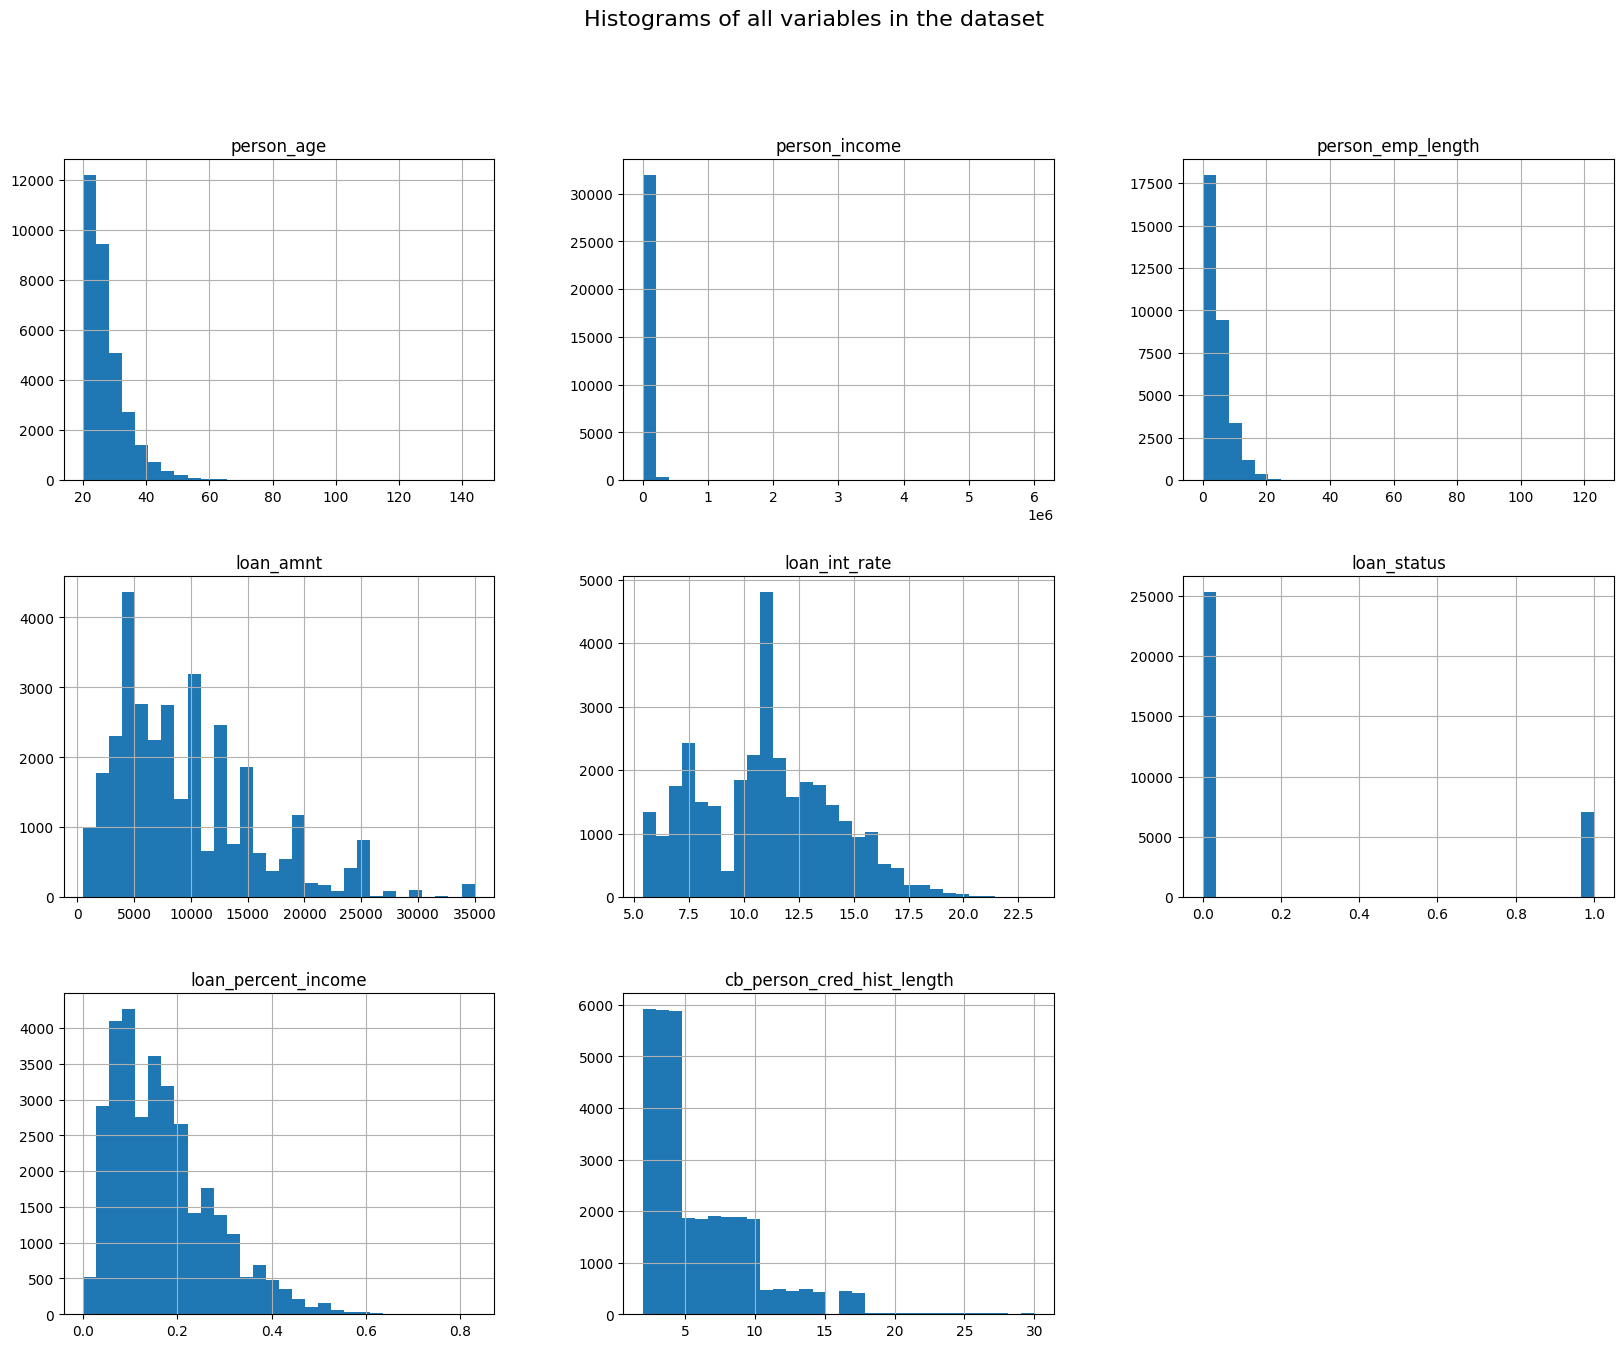

In [76]:

# explore the distributions of all the variables in the dataset by plotting histograms with pandas
data.hist(bins=30, figsize=(20,15))
plt.suptitle('Histograms of all variables in the dataset', fontsize=16)
plt.show()

In [45]:
numerical_features = data.select_dtypes(include=np.number).columns
len(numerical_features)

8

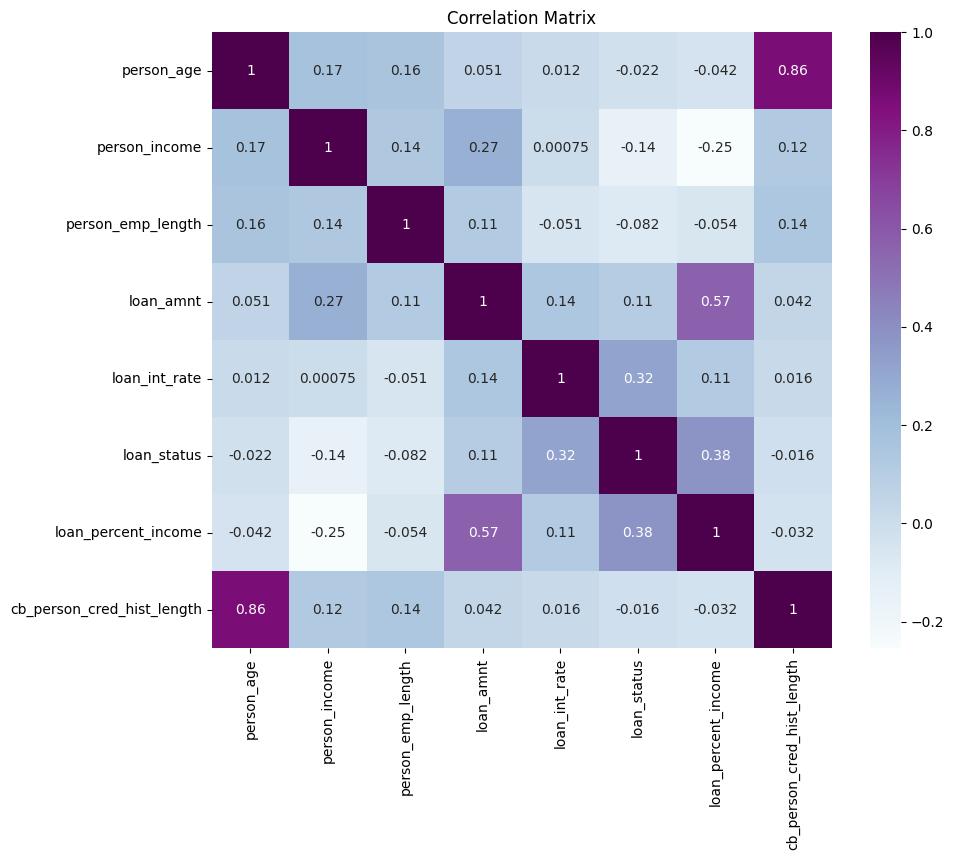

In [260]:

corr = data[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')
plt.title('Correlation Matrix')
plt.show()

In [261]:

def transform_numerical_features(data, numerical_features):
    """
    Apply transformations to numerical features based on skewness:
    - Log transformation for highly skewed features
    - Square root transformation for moderately skewed features
    - Standardization for slightly skewed or symmetric features

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the features.
    - numerical_features (list): List of numerical feature column names.

    Returns:
    - pd.DataFrame: Transformed DataFrame
    """
    for feature in numerical_features:
        # Calculate skewness
        skewness = data[feature].skew()
        print(f"{feature} - Original Skewness: {skewness}")

        # Choose transformation based on skewness
        if skewness > 1:
            # Highly skewed, use log transformation (add 1 to handle zeros)
            data[feature] = np.log1p(data[feature])
            print(f"Log Transformation applied to {feature}")
        elif 0.5 < skewness <= 1:
            # Moderately skewed, use square root transformation
            data[feature] = np.sqrt(data[feature])
            print(f"Square Root Transformation applied to {feature}")
        else:
            # For slightly skewed or symmetric, use standardization
            data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()
            print(f"Standardization applied to {feature}")

        # Visualize the transformed data
        plt.figure(figsize=(8, 4))
        sns.histplot(data[feature], kde=True)
        plt.title(f"{feature} after transformation")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()
    
    return data

In [262]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
len(numerical_features)

7

person_age - Original Skewness: 2.5813925261849846
Log Transformation applied to person_age


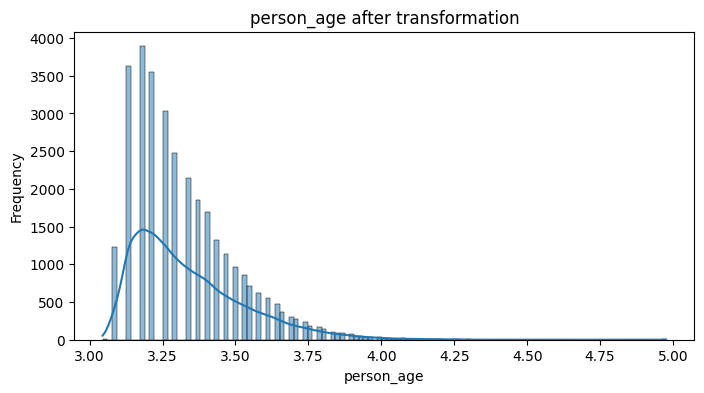

person_income - Original Skewness: 32.865348833904434
Log Transformation applied to person_income


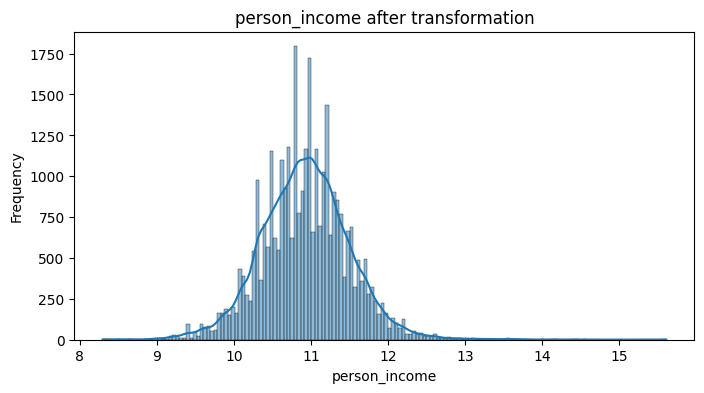

person_emp_length - Original Skewness: 2.6628784524960363
Log Transformation applied to person_emp_length


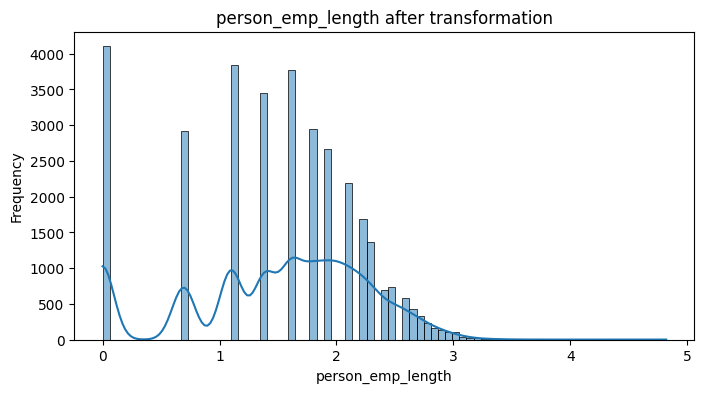

loan_amnt - Original Skewness: 1.1924774277661998
Log Transformation applied to loan_amnt


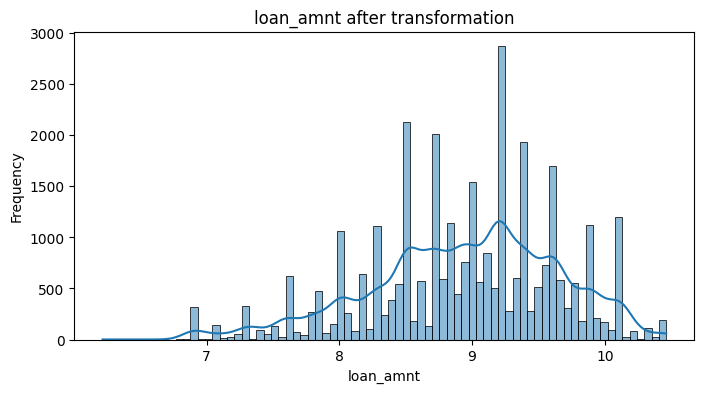

loan_int_rate - Original Skewness: 0.21929952450406942
Standardization applied to loan_int_rate


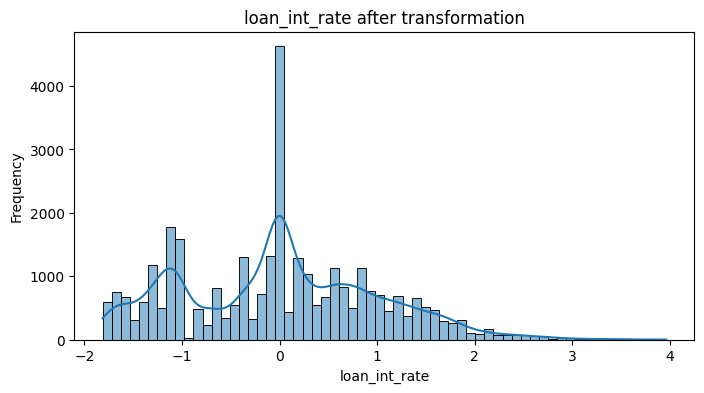

loan_percent_income - Original Skewness: 1.0646686367683245
Log Transformation applied to loan_percent_income


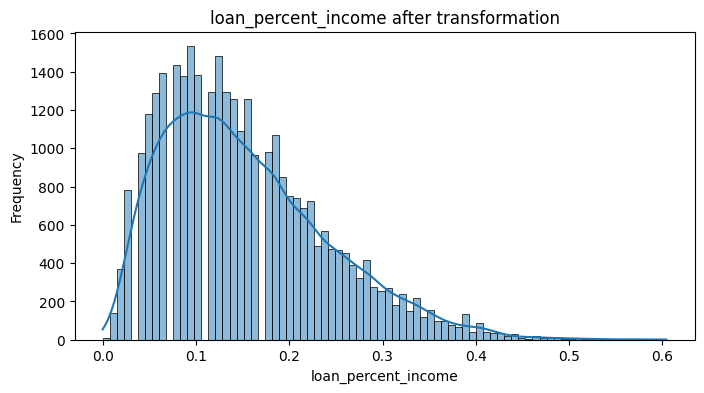

cb_person_cred_hist_length - Original Skewness: 1.6617901199126253
Log Transformation applied to cb_person_cred_hist_length


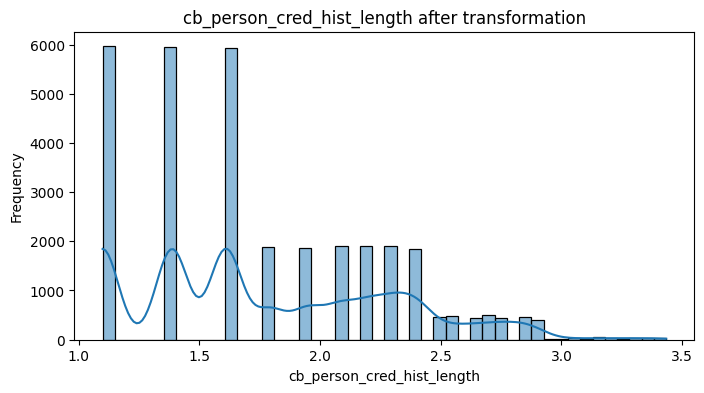

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.135494,10.985310,rent,4.820282,personal,d,10.463132,1.625226,1,0.463734,y,1.386294
1,3.091042,9.169623,own,1.791759,education,b,6.908755,0.041636,0,0.095310,n,1.098612
2,3.258097,9.169623,mortgage,0.693147,medical,c,8.612685,0.603032,1,0.451076,n,1.386294
3,3.178054,11.089821,rent,1.609438,medical,c,10.463132,1.368866,1,0.425268,n,1.098612
4,3.218876,10.904138,rent,2.197225,medical,c,10.463132,1.057340,1,0.438255,y,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.060443,10.878066,mortgage,0.693147,personal,c,8.665786,0.697138,0,0.104360,n,3.433987
32577,4.007333,11.695255,mortgage,1.609438,personal,a,9.777130,-1.142812,0,0.139762,n,2.995732
32578,4.189655,11.238502,rent,1.386294,homeimprovement,b,10.463132,-0.007040,1,0.378436,n,3.367296
32579,4.043051,11.918397,mortgage,1.791759,personal,b,9.615872,0.151968,0,0.095310,n,3.295837


In [263]:
transform_numerical_features(data, numerical_features)

In [60]:
categorical_features = data.select_dtypes(include='object').columns
categorical_features

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [265]:
def count_categorical_features(data:DataFrame, columns:str)->str:
    """
    Count the number of unique values in each categorical feature.
    Args:
        data (pd.DataFrame): The DataFrame containing the features.
        columns (str): The column to count the unique values.
    Returns:
        str: The unique values for each categorical feature.
    """
    
    value = data[columns].value_counts()
    
    return value

In [266]:
count_categorical_features(data, 'loan_grade')

loan_grade
a    10777
b    10451
c     6458
d     3626
e      964
f      241
g       64
Name: count, dtype: int64

In [267]:
count_categorical_features(data, 'loan_intent')

loan_intent
education            6453
medical              6071
venture              5719
personal             5521
debtconsolidation    5212
homeimprovement      3605
Name: count, dtype: int64

In [268]:
count_categorical_features(data, 'person_home_ownership')

person_home_ownership
rent        16446
mortgage    13444
own          2584
other         107
Name: count, dtype: int64

In [269]:
count_categorical_features(data, 'cb_person_default_on_file')

cb_person_default_on_file
n    26836
y     5745
Name: count, dtype: int64

In [270]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.135494,10.985310,rent,4.820282,personal,d,10.463132,1.625226,1,0.463734,y,1.386294
1,3.091042,9.169623,own,1.791759,education,b,6.908755,0.041636,0,0.095310,n,1.098612
2,3.258097,9.169623,mortgage,0.693147,medical,c,8.612685,0.603032,1,0.451076,n,1.386294
3,3.178054,11.089821,rent,1.609438,medical,c,10.463132,1.368866,1,0.425268,n,1.098612
4,3.218876,10.904138,rent,2.197225,medical,c,10.463132,1.057340,1,0.438255,y,1.609438


In [271]:
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.135494,10.985310,rent,4.820282,personal,d,10.463132,1.625226,1,0.463734,y,1.386294
1,3.091042,9.169623,own,1.791759,education,b,6.908755,0.041636,0,0.095310,n,1.098612
2,3.258097,9.169623,mortgage,0.693147,medical,c,8.612685,0.603032,1,0.451076,n,1.386294
3,3.178054,11.089821,rent,1.609438,medical,c,10.463132,1.368866,1,0.425268,n,1.098612
4,3.218876,10.904138,rent,2.197225,medical,c,10.463132,1.057340,1,0.438255,y,1.609438
5,3.091042,9.200391,own,1.098612,venture,a,7.824446,-1.256389,1,0.223144,n,1.098612
6,3.295837,11.252872,rent,2.197225,education,b,10.463132,0.457004,1,0.371564,n,1.386294
7,3.218876,11.276659,rent,1.791759,medical,b,10.463132,0.031901,1,0.364643,n,1.609438
8,3.218876,11.326608,rent,2.197225,personal,a,10.463132,-0.685258,1,0.350657,n,1.098612
9,3.091042,9.210440,own,1.945910,venture,d,7.378384,1.209858,1,0.148420,n,1.386294


In [272]:
data.loan_grade.value_counts()

loan_grade
a    10777
b    10451
c     6458
d     3626
e      964
f      241
g       64
Name: count, dtype: int64

In [273]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.135494,10.985310,rent,4.820282,personal,d,10.463132,1.625226,1,0.463734,y,1.386294
1,3.091042,9.169623,own,1.791759,education,b,6.908755,0.041636,0,0.095310,n,1.098612
2,3.258097,9.169623,mortgage,0.693147,medical,c,8.612685,0.603032,1,0.451076,n,1.386294
3,3.178054,11.089821,rent,1.609438,medical,c,10.463132,1.368866,1,0.425268,n,1.098612
4,3.218876,10.904138,rent,2.197225,medical,c,10.463132,1.057340,1,0.438255,y,1.609438


In [277]:
data.shape

(32581, 12)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  float64
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  float64
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.0+ MB


In [279]:
load_data =  data.to_csv('../data/processed/credit_risk_dataset.csv',index=False)